In [ ]:

#Make rainfall data for Exercise 1. adjust

import pandas as pd
import numpy as np

# Create 60 days of dates
dates = pd.date_range(start='2024-01-01', periods=60, freq='D')

# Base rainfall (using gamma distribution for realism)
np.random.seed(42)
rain = np.random.gamma(shape=0.5, scale=1.0, size=60)
rain = np.where(rain < 0.1, 0, rain) 

df = pd.DataFrame({'Date': dates, 'Precip_in': rain})

# --- INTENTIONAL ERRORS ---
df.loc[10:12, 'Precip_in'] = np.nan           # Tutorial 5: Missing values
df.loc[25, 'Precip_in'] = -999.0              # Tutorial 4/5: No-data codes
df.loc[40, 'Precip_in'] = 'T'                 # Tutorial 1/4: Trace (string data)
df.loc[41, 'Precip_in'] = 'Sensor Error'      # Tutorial 1: Non-numeric strings
df.loc[55, 'Precip_in'] = 500.0               # Tutorial 2/3: Impossible outlier
df = pd.concat([df, df.iloc[[15]]]).sort_index() # Tutorial 4: Duplicate row

# Save it or just print it
print("Dataset Ready for Audit!")


Dataset Ready for Audit!


/scratch/local/u1154915/845473/ipykernel_1209593/1833240354.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'T' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[40, 'Precip_in'] = 'T'                 # Tutorial 1/4: Trace (string data)


In [8]:
df.head(30)

,Date,Precip_in
0,2024-01-01,0.14028
1,2024-01-02,0.659018
2,2024-01-03,0.0
3,2024-01-04,0.0
4,2024-01-05,0.375729
5,2024-01-06,0.0
6,2024-01-07,1.095458
7,2024-01-08,0.0
8,2024-01-09,0.0
9,2024-01-10,0.186576


In [14]:
df.describe()

,Date
count,61
mean,2024-01-30 06:17:42.295081984
min,2024-01-01 00:00:00
25%,2024-01-16 00:00:00
50%,2024-01-30 00:00:00
75%,2024-02-14 00:00:00
max,2024-02-29 00:00:00


In [15]:
# 'coerce' turns anything it can't read as a number (like 'T' or 'error') into NaN
df['Precip_in'] = pd.to_numeric(df['Precip_in'], errors='coerce')

# Now try it!
print(df.describe())


                                Date   Precip_in
count                             61   56.000000
mean   2024-01-30 06:17:42.295081984   -8.467089
min              2024-01-01 00:00:00 -999.000000
25%              2024-01-16 00:00:00    0.000000
50%              2024-01-30 00:00:00    0.050563
75%              2024-02-14 00:00:00    0.682890
max              2024-02-29 00:00:00  500.000000
std                              NaN  150.395286


In [1]:
#generate streamflow data for the exercise
import pandas as pd
import numpy as np

# 1. Setup Dates (Matching your Rainfall)
dates = pd.date_range(start='2024-01-01', periods=60, freq='D')

# 2. Generate Base Rainfall (Tutorial 1)
np.random.seed(42)
rain = np.random.gamma(shape=0.5, scale=1.0, size=60)
rain = np.round(rain, 2)
rain[55] = 500.0  # The "Impossible Outlier"

# 3. Generate Streamflow (Reactive to Rain)
# Base flow is 10 cfs, increases by 5x the rain amount
flow = 10 + (rain * 5.0) 

# Add a 1-day lag for realism (Tutorial 4: Data Manipulation)
flow = np.roll(flow, 1) 

# 4. Inject "Messy" Streamflow Errors
flow_series = pd.Series(flow)
flow_series[10:15] = np.nan        # Tutorial 5: Sensor Gap
flow_series[25] = -999.0           # Tutorial 4/5: No-Data Code
flow_series[30] = 'STATION_OFF'    # Tutorial 1: Object/String Error

# 5. Create the Master DataFrame
df = pd.DataFrame({
    'Date': dates,
    'Precip_in': rain,
    'Streamflow_cfs': flow_series
})

print("Multi-Sensor Dataset Created!")


Multi-Sensor Dataset Created!


/scratch/local/u1154915/845473/ipykernel_1209593/2784162979.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'STATION_OFF' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  flow_series[30] = 'STATION_OFF'    # Tutorial 1: Object/String Error


In [2]:
df.pop('Precip_in')  # Remove the rainfall column to focus on streamflow
df.head()

,Date,Streamflow_cfs
0,2024-01-01,10.25
1,2024-01-02,10.7
2,2024-01-03,13.3
3,2024-01-04,10.1
4,2024-01-05,10.0


In [3]:
df.to_csv('data/streamflow_data.csv', index=False)

In [6]:
streamflow_df = pd.read_csv('data/streamflow_data.csv')
streamflow_df.head(40)

,Date,Streamflow_cfs
0,2024-01-01,10.25
1,2024-01-02,10.7
2,2024-01-03,13.3
3,2024-01-04,10.1
4,2024-01-05,10.0
5,2024-01-06,11.9
6,2024-01-07,10.0
7,2024-01-08,15.5
8,2024-01-09,10.15
9,2024-01-10,10.45


In [15]:
# working through exercises

#Task 1: Load the rainfall data and display the first few rows to understand its structure.
rainfall_df = pd.read_csv('data/snotel_rainfall_data.csv')
rainfall_df.head(10)

,Date,Precip_in
0,2024-01-01,0.14028030062619642
1,2024-01-02,0.6590180328421851
2,2024-01-03,0.0
3,2024-01-04,0.0
4,2024-01-05,0.3757291395473922
5,2024-01-06,0.0
6,2024-01-07,1.0954577625968716
7,2024-01-08,0.0
8,2024-01-09,0.0
9,2024-01-10,0.18657649912973773


In [16]:
rainfall_df.describe()

,Date,Precip_in
count,61,58
unique,60,32
top,2024-01-16,0.0
freq,2,27


In [17]:
#Task 2, use pandas to make the data readable
rainfall_df['Precip_in'] = pd.to_numeric(rainfall_df['Precip_in'], errors='coerce')

rainfall_df.describe()

,Precip_in
count,56.000000
mean,-8.467089
std,150.395286
min,-999.000000
25%,0.000000
50%,0.050563
75%,0.682890
max,500.000000


In [18]:
# Load the dischrage data
streamflow_df = pd.read_csv('data/streamflow_data.csv')
streamflow_df.head(20)

,Date,Streamflow_cfs
0,2024-01-01,10.25
1,2024-01-02,10.7
2,2024-01-03,13.3
3,2024-01-04,10.1
4,2024-01-05,10.0
5,2024-01-06,11.9
6,2024-01-07,10.0
7,2024-01-08,15.5
8,2024-01-09,10.15
9,2024-01-10,10.45


In [19]:
streamflow_df.describe()

,Date,Streamflow_cfs
count,60,55
unique,60,37
top,2024-01-01,10.0
freq,1,8


In [20]:
streamflow_df['Streamflow_cfs'] = pd.to_numeric(streamflow_df['Streamflow_cfs'], errors='coerce')
streamflow_df.describe()

,Streamflow_cfs
count,54.000000
mean,40.058333
std,369.096212
min,-999.000000
25%,10.100000
50%,10.600000
75%,13.900000
max,2510.000000


In [40]:
#clean and repair the data

#first we need to convert all -999.0 values to NaN
rainfall_df['Precip_in'] = rainfall_df['Precip_in'].replace(-999.0, np.nan)

#also need to remove outliers, we can use the 99th percentile as a threshold
threshold = rainfall_df['Precip_in'].quantile(0.99)
rainfall_df['Precip_in'] = rainfall_df['Precip_in'].apply(lambda x: x if x <= threshold else np.nan)

#rainfall, use dropna() to remove rows with missing values
rain_dropna = rainfall_df.dropna(subset=['Precip_in'])
rain_dropna.describe()


,Precip_in
count,53.000000
mean,0.400635
std,0.665179
min,0.000000
25%,0.000000
50%,0.000000
75%,0.588250
max,3.380971


In [41]:
#rainfall, use fillna() to replace missing values with the mean
rain_fillna = rainfall_df.copy()
rain_fillna['Precip_in'] = rain_fillna['Precip_in'].fillna(rain_fillna['Precip_in'].mean())
rain_fillna.describe()

,Precip_in
count,61.000000
mean,0.400635
std,0.619248
min,0.000000
25%,0.000000
50%,0.168414
75%,0.429252
max,3.380971


In [42]:
#rainfall, use interpolation to estimate missing values
rain_interpolate = rainfall_df.copy()
rain_interpolate['Precip_in'] = rain_interpolate['Precip_in'].interpolate(method='linear')
rain_interpolate.describe()

,Precip_in
count,61.000000
mean,0.380416
std,0.632239
min,0.000000
25%,0.000000
50%,0.093288
75%,0.532611
max,3.380971


In [43]:
#Do the same for streamflow
streamflow_df['Streamflow_cfs'] = streamflow_df['Streamflow_cfs'].replace(-999.0, np.nan)
threshold_flow = streamflow_df['Streamflow_cfs'].quantile(0.99)
streamflow_df['Streamflow_cfs'] = streamflow_df['Streamflow_cfs'].apply(lambda x: x if x <= threshold_flow else np.nan) 

# create three versions of the streamflow data with different cleaning methods
#1. dropna
flow_dropna = streamflow_df.dropna(subset=['Streamflow_cfs'])
#2. fillna with mean
flow_fillna = streamflow_df.copy()
flow_fillna['Streamflow_cfs'] = flow_fillna['Streamflow_cfs'].fillna(flow_fillna['Streamflow_cfs'].mean())
#3. interpolate
flow_interpolate = streamflow_df.copy()
flow_interpolate['Streamflow_cfs'] = flow_interpolate['Streamflow_cfs'].interpolate(method='linear')


In [ ]:
#Join the dataframes back together for analysis
#set all dataframes to have the same index of Date for easy joining
rain_dropna.set_index('Date', inplace=True)
rain_fillna.set_index('Date', inplace=True)
rain_interpolate.set_index('Date', inplace=True)

# Join rainfall_methods  by the index of Date
rain_methods = pd.concat([rain_fillna['Precip_in'], rain_interpolate['Precip_in']], axis=1)
rain_methods.columns = ['Precip_fillna', 'Precip_interpolate']


In [53]:
#merge rainfall dropna with rain_methods
rain_methods = rain_methods[~rain_methods.index.duplicated(keep='first')]
rain_dropna = rain_dropna[~rain_dropna.index.duplicated(keep='first')]

rain_methods = pd.concat([rain_methods, rain_dropna], axis=1)
rain_methods.head() #.columns = ['Precip_dropna', 'Precip_fillna', 'Precip_interpolate']

,Precip_fillna,Precip_interpolate,Precip_in
Date,,,
2024-01-01,0.140280,0.140280,0.140280
2024-01-02,0.659018,0.659018,0.659018
2024-01-03,0.000000,0.000000,0.000000
2024-01-04,0.000000,0.000000,0.000000
2024-01-05,0.375729,0.375729,0.375729


In [56]:
#do the same steps as above to merge the streamflow dataframes
#set all dataframes to have the same index of Date for easy joining
flow_dropna.set_index('Date', inplace=True)
flow_fillna.set_index('Date', inplace=True)
flow_interpolate.set_index('Date', inplace=True)

flow_methods = pd.concat([flow_fillna['Streamflow_cfs'], flow_interpolate['Streamflow_cfs']], axis=1)
flow_methods.columns = ['Flow_fillna', 'Flow_interpolate']  

flow_methods = flow_methods[~flow_methods.index.duplicated(keep='first')]
flow_dropna = flow_dropna[~flow_dropna.index.duplicated(keep='first')]

flow_methods = pd.concat([flow_methods, flow_dropna], axis=1)
flow_methods.head() #.columns = ['Flow_dropna', 'Flow_fillna', 'Flow_interpolate']

,Flow_fillna,Flow_interpolate,Streamflow_cfs
Date,,,
2024-01-01,10.25,10.25,10.25
2024-01-02,10.70,10.70,10.70
2024-01-03,13.30,13.30,13.30
2024-01-04,10.10,10.10,10.10
2024-01-05,10.00,10.00,10.00


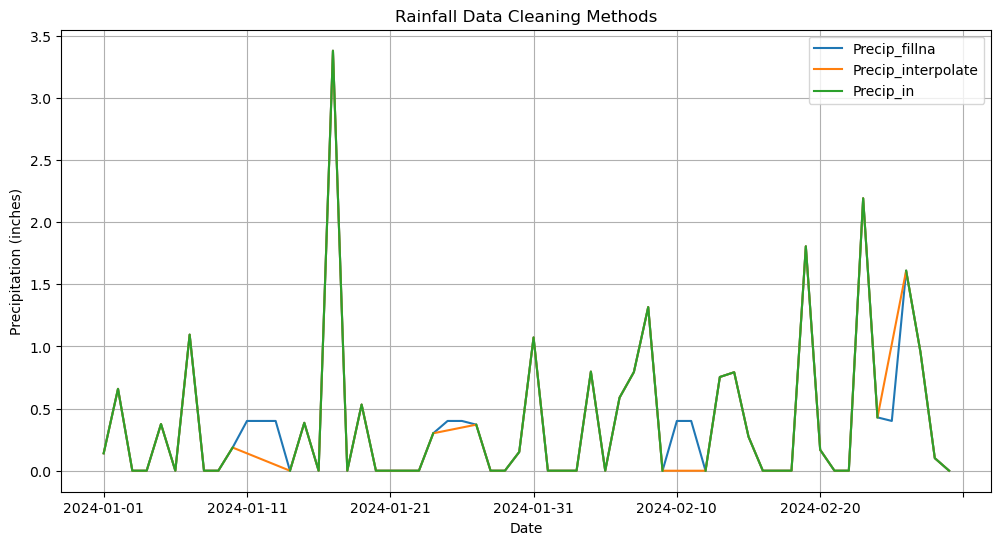

In [57]:
#plot the rainfall data using pandas built in plotting functions
import matplotlib.pyplot as plt 
rain_methods.plot(figsize=(12,6), title='Rainfall Data Cleaning Methods')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

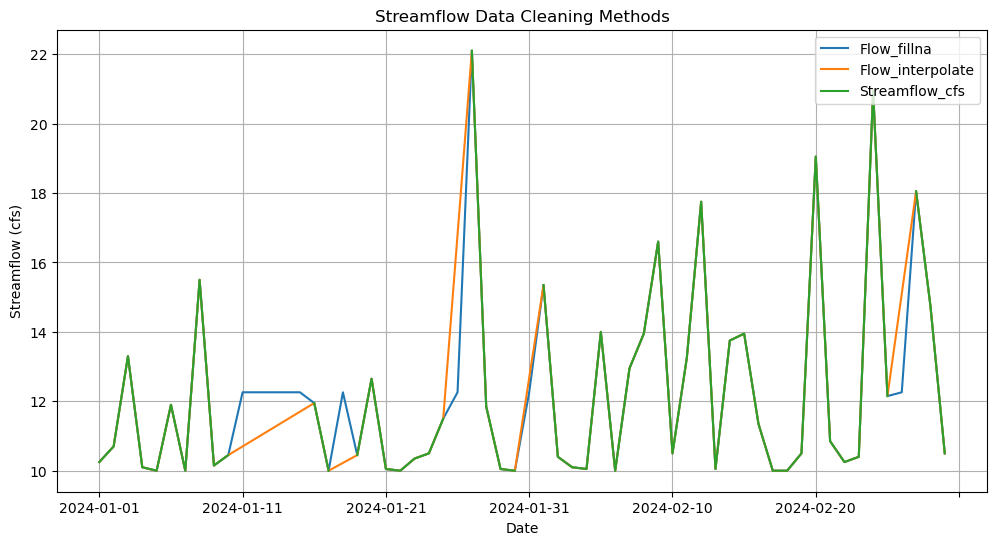

In [58]:
#plot the streamflow data using pandas built in plotting functions
flow_methods.plot(figsize=(12,6), title='Streamflow Data Cleaning Methods')
plt.xlabel('Date')
plt.ylabel('Streamflow (cfs)')
plt.legend(loc='upper right')
plt.grid()

In [59]:
#combine the rainfall and streamflow data interpolate methods to see how they compare
combined_methods = pd.concat([rain_methods['Precip_interpolate'], flow_methods['Flow_interpolate']], axis=1)
combined_methods.columns = ['Precip_interpolate', 'Flow_interpolate']
combined_methods.head()

,Precip_interpolate,Flow_interpolate
Date,,
2024-01-01,0.140280,10.25
2024-01-02,0.659018,10.70
2024-01-03,0.000000,13.30
2024-01-04,0.000000,10.10
2024-01-05,0.375729,10.00


In [61]:
#calculate the monthly totals for rainfall and streamflow using the interpolate methods
#convert the combined_methods index to datetime if it's not already
combined_methods.index = pd.to_datetime(combined_methods.index)
monthly_totals = combined_methods.resample('M').sum()
monthly_totals.head()

/scratch/local/u1154915/845473/ipykernel_1209593/2686947634.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_totals = combined_methods.resample('M').sum()


,Precip_interpolate,Flow_interpolate
Date,,
2024-01-31,9.604555,359.50
2024-02-29,13.600824,376.55


In [63]:
#calculate the mean daily for rainfall and streamflow using the interpolate methods
daily_mean = combined_methods.resample('M').mean()
daily_mean.head()

/scratch/local/u1154915/845473/ipykernel_1209593/2957147131.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  daily_mean = combined_methods.resample('M').mean()


,Precip_interpolate,Flow_interpolate
Date,,
2024-01-31,0.309824,11.596774
2024-02-29,0.468994,12.984483


In [64]:
# Determine the maximum monthly rainfall and streamflow using the interpolate methods
monthly_max = combined_methods.resample('M').max()
monthly_max.head()

/scratch/local/u1154915/845473/ipykernel_1209593/1246726075.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_max = combined_methods.resample('M').max()


,Precip_interpolate,Flow_interpolate
Date,,
2024-01-31,3.380971,22.10
2024-02-29,2.193069,20.95


In [66]:
#create a new dataframe for data corrections
rain_flow_SI_df =combined_methods.copy()
 #convert the PRecip_interpolate to mm and Flow_interpolate to cms
rain_flow_SI_df['Precip_mm'] = rain_flow_SI_df['Precip_interpolate'] * 25.4
rain_flow_SI_df['Flow_cms'] = rain_flow_SI_df['Flow_interpolate'] * 0.0283168

#remove the original columns
rain_flow_SI_df.drop(columns=['Precip_interpolate', 'Flow_interpolate'], inplace=True)
rain_flow_SI_df.head()

,Precip_mm,Flow_cms
Date,,
2024-01-01,3.563120,0.290247
2024-01-02,16.739058,0.302990
2024-01-03,0.000000,0.376613
2024-01-04,0.000000,0.286000
2024-01-05,9.543520,0.283168


In [67]:
#create a new column in the rain_flow_SI_df to programatically label each day as dry, light rain, or heavy rain based on the Precip_mm column
def label_rain(row):
    if row['Precip_mm'] == 0:
        return 'Dry'
    elif row['Precip_mm'] < 2.5:
        return 'Light Rain'
    else:
        return 'Heavy Rain'
    
rain_flow_SI_df['Rain_Label'] = rain_flow_SI_df.apply(label_rain, axis=1)
rain_flow_SI_df.head()

,Precip_mm,Flow_cms,Rain_Label
Date,,,
2024-01-01,3.563120,0.290247,Heavy Rain
2024-01-02,16.739058,0.302990,Heavy Rain
2024-01-03,0.000000,0.376613,Dry
2024-01-04,0.000000,0.286000,Dry
2024-01-05,9.543520,0.283168,Heavy Rain


In [ ]:
#programatially select the 5 days before and 5 days after the peak streamflow day to analyze the rainfall patterns leading up to and following the peak flow event
peak_flow_day = rain_flow_SI_df['Flow_cms'].idxmax()
analysis_window = rain_flow_SI_df.loc[peak_flow_day - pd.Timedelta(days=5): peak_flow_day + pd.Timedelta(days=5)]
analysis_window.head(15)

,Precip_mm,Flow_cms,Rain_Label
Date,,,
2024-01-22,0.000000,0.283168,Dry
2024-01-23,0.000000,0.293079,Dry
2024-01-24,7.656654,0.297326,Heavy Rain
2024-01-25,8.244083,0.325643,Heavy Rain
2024-01-26,8.831513,0.475722,Heavy Rain
2024-01-27,9.418942,0.625801,Heavy Rain
2024-01-28,0.000000,0.335554,Dry
2024-01-29,0.000000,0.284584,Dry
2024-01-30,3.837179,0.283168,Heavy Rain


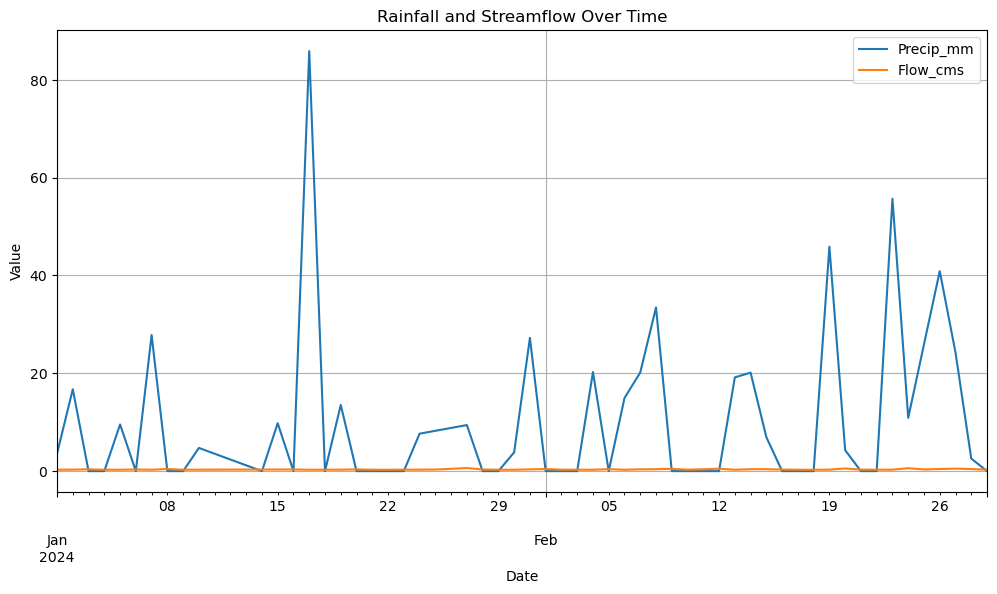

In [69]:
#plot the streamflow and rainfall for the rain_flow_SI_df on one plot.
hydrodata = rain_flow_SI_df.copy()
columns_to_plot = ['Precip_mm', 'Flow_cms']
hydrodata[columns_to_plot].plot(figsize=(12,6), title='Rainfall and Streamflow Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.grid()